In [1]:
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split


N = 10000
cols = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun',
        'avrg_fav_count', 'avrg_retweet_count', 'favourites_count', 'followers_count', 
        'friends_count', 'numberoftweets', 'url_tweet_ratio',
        'h_0', 'h_6', 'h_12', 'h_18',
        'identified_as_person']

df = pd.read_csv('final.csv', nrows=N, usecols=cols)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Fri                     10000 non-null float64
Mon                     10000 non-null float64
Sat                     10000 non-null float64
Sun                     10000 non-null float64
Thu                     10000 non-null float64
Tue                     10000 non-null float64
Wed                     10000 non-null float64
avrg_fav_count          10000 non-null float64
avrg_retweet_count      10000 non-null float64
h_0                     10000 non-null float64
h_12                    10000 non-null float64
h_18                    10000 non-null float64
h_6                     10000 non-null float64
favourites_count        10000 non-null float64
followers_count         10000 non-null float64
friends_count           10000 non-null float64
numberoftweets          10000 non-null float64
identified_as_person    10000 non-null object
url_tweet_ratio         10000 non-null float64


/home/tahion/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
label_idx = 17
vals = df.values

train_set, test_set = train_test_split(vals, train_size = 0.8)

idx = [i for i in range(np.shape(df)[1]) if i not in [label_idx]]
train_x = train_set[:, idx]   # all but `label_idx`th column
train_y = train_set[:, label_idx]

test_x = test_set[:, idx]
test_y = test_set[:, label_idx]


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

# min_max = MinMaxScaler()
# train_x = min_max.fit_transform(train_x)
# test_x = min_max.fit_transform(test_x)

train_x = scale(train_x)
test_x = scale(test_x)

/home/tahion/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


<IPython.core.display.Javascript object>


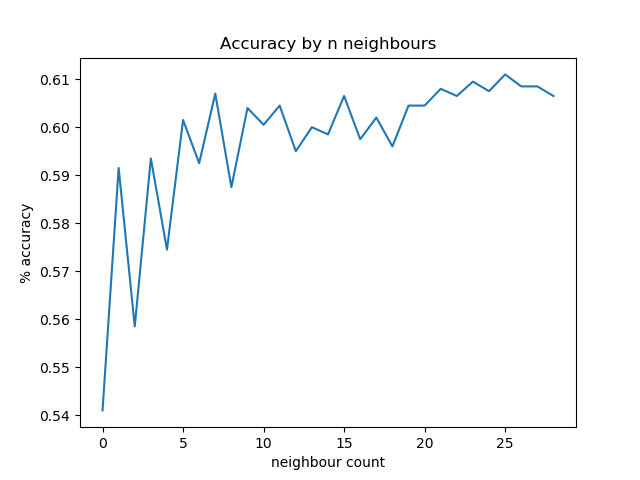

In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

scores = list()
x = range(1, 30)

for n in x:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_x, train_y)
    acc = accuracy_score(test_y, knn.predict(test_x))
    scores.append(acc)
    
plt.plot(scores)
plt.title("Accuracy by n neighbours")
plt.xlabel("neighbour count")
plt.ylabel("% accuracy")
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(penalty='l2', C=.01)
log.fit(train_x, train_y)
acc = accuracy_score(test_y, log.predict(test_x))

print(acc)

0.6275


In [21]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_x, train_y) 
acc = accuracy_score(test_y, svm.predict(test_x))

print(acc)

0.6365


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

np.random.seed(1337)

Using TensorFlow backend.
/home/tahion/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [5]:
label_idx = 17
vals = df.values

for i in range(vals.shape[0]):
    vals[i,label_idx] = 0 if vals[i,label_idx] == 'f' else 1

train_set, test_set = train_test_split(vals, train_size = 0.8)

idx = [i for i in range(np.shape(vals)[1]) if i not in [label_idx]]
train_x = train_set[:, idx]   # all but `label_idx`th column
train_y = train_set[:, label_idx]

test_x = test_set[:, idx]
test_y = test_set[:, label_idx]

train_x = scale(train_x)
test_x = scale(test_x)

train_y = np.ravel(train_y)
test_y = np.ravel(test_y)

/home/tahion/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [7]:
model = Sequential()
model.add(Dense(200, input_dim=train_x.shape[1], activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.005), metrics=['accuracy'])

model.fit(train_x, train_y, epochs=100, batch_size=100)

scores_test = model.evaluate(test_x, test_y)
scores_train = model.evaluate(train_x, train_y)
print("\nAcc on test data: %.2f%%" % (scores_test[1]*100))
print("\nAcc on train data: %.2f%%" % (scores_train[1]*100))

Epoch 1/100
8000/8000 [==============================] - 1s 74us/step - loss: 0.6687 - acc: 0.6205
Epoch 2/100
8000/8000 [==============================] - 0s 58us/step - loss: 0.6581 - acc: 0.6255
Epoch 3/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.6564 - acc: 0.6250
Epoch 4/100
8000/8000 [==============================] - 0s 62us/step - loss: 0.6520 - acc: 0.6249
Epoch 5/100
8000/8000 [==============================] - 1s 64us/step - loss: 0.6506 - acc: 0.6270
Epoch 6/100
8000/8000 [==============================] - 1s 66us/step - loss: 0.6460 - acc: 0.6315
Epoch 7/100
8000/8000 [==============================] - 1s 63us/step - loss: 0.6440 - acc: 0.6314
Epoch 8/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.6414 - acc: 0.6399
Epoch 9/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.6411 - acc: 0.6371
Epoch 10/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.6356 - acc: 0.6436
Epoch 11/

8000/8000 [==============================] - 0s 61us/step - loss: 0.3730 - acc: 0.8217
Epoch 84/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3767 - acc: 0.8224
Epoch 85/100
8000/8000 [==============================] - 0s 49us/step - loss: 0.3693 - acc: 0.8232
Epoch 86/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.3630 - acc: 0.8237
Epoch 87/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.3647 - acc: 0.8289
Epoch 88/100
8000/8000 [==============================] - 0s 50us/step - loss: 0.3623 - acc: 0.8281
Epoch 89/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.3663 - acc: 0.8311
Epoch 90/100
8000/8000 [==============================] - 1s 64us/step - loss: 0.3606 - acc: 0.8317
Epoch 91/100
8000/8000 [==============================] - 1s 63us/step - loss: 0.3592 - acc: 0.8298
Epoch 92/100
8000/8000 [==============================] - 0s 53us/step - loss: 0.3621 - acc: 0.8292
Epoch 93/100
